In [40]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import pandas as pd

In [41]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, \
                Input, GlobalAveragePooling2D
from keras.preprocessing import image

import keras
import tensorflow
import logging
logging.basicConfig()
import struct

# use channels first representation for images
from keras import backend as K
K.set_image_data_format('channels_first')

from keras.callbacks import TensorBoard

env: KERAS_BACKEND=tensorflow


In [42]:
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('iteration')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'acc' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['acc'], 'b', label="training acc ({:.4f})".format(history.history['acc'][-1]))
        ax2.plot(history.history['val_acc'], 'b--', label="validation acc ({:.4f})".format(history.history['val_acc'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

# Training

In [43]:
traindf = pd.read_csv('converted_1.csv')
random.seed(100)
traindf = traindf.sample(1000)
X = array(traindf.drop('action', axis=1))
Y = list(traindf.iloc[:,-1])

In [44]:
trainX, testX, trainY, testY = \
    model_selection.train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4487)

# make validation data
testset = (testX, testY)

print(trainX.shape)
print(testX.shape)

(800, 19)
(200, 19)


In [45]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)

testsetn = (testXn, testY)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                640       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 51        
Total params: 1,219
Trainable params: 1,219
Non-trainable params: 0
_________________________________________________________________
test testing set accuracy= 0.87
Saved to model.json and model.h5


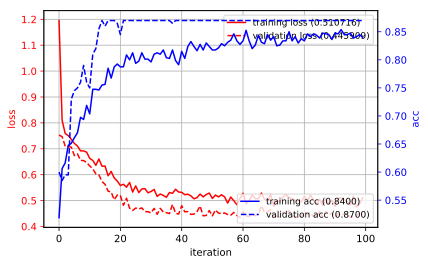

In [46]:
random.seed(100)
tensorflow.set_random_seed(1000)
callbacks_list = []

nn = Sequential()
nn.add(Dense(units=32, activation='relu',input_dim=trainX.shape[1]))
nn.add(Dropout(rate=0.5, seed=44))
nn.add(Dense(units=16, activation='relu'))
nn.add(Dropout(rate=0.5, seed=44))
nn.add(Dense(units=3, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy'])

history = nn.fit(trainX, trainY, epochs=100, batch_size=50,
    callbacks=callbacks_list,
    validation_data=testset, verbose=False)

nn.summary()
plot_history(history)
predY = nn.predict_classes(testX, verbose=False)
# calculate accuracy
acc = metrics.accuracy_score(testY, predY)
print("test testing set accuracy=", acc)

json_file_name = 'model.json'
model_file_name = 'model.h5'
model_json = nn.to_json()
json_file = open(json_file_name, 'w')
json_file.write(model_json)
nn.save_weights(model_file_name)
json_file.close()
print('Saved to {} and {}'.format(json_file_name, model_file_name))

In [47]:
# random.seed(100)
# tensorflow.set_random_seed(1000)
# callbacks_list = []

# nnx = Sequential()
# nnx.add(Dense(units=32, activation='relu',input_dim=trainX.shape[1]))
# nnx.add(Dropout(rate=0.5, seed=44))
# nnx.add(Dense(units=16, activation='relu'))
# nnx.add(Dropout(rate=0.5, seed=44))
# nnx.add(Dense(units=3, activation='softmax'))

# # compile and fit the network
# nnx.compile(loss=keras.losses.sparse_categorical_crossentropy,
#     optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
#     metrics=['accuracy'])

# history = nnx.fit(trainXn, trainY, epochs=100, batch_size=50,
#     callbacks=callbacks_list,
#     validation_data=testsetn, verbose=False)

# nnx.summary()
# plot_history(history)
# predY = nnx.predict_classes(testXn, verbose=False)
# # calculate accuracy
# acc = metrics.accuracy_score(testY, predY)
# print("test testing set accuracy=", acc)

In [48]:
# load trained model from json
model_file = open('model.json', 'r')
model = model_file.read()
model_file.close()
nn = model_from_json(model)
nn.load_weights('model.h5')
print('Loaded model from files')

Loaded model from files


In [58]:
a = array([[1, 0, 0, 0, 9, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5]])
predY = nn.predict_proba(a, verbose=False)

In [59]:
print(predY[0])

[0.11029501 0.20757408 0.6821309 ]


In [ ]:
p = nn